# Progression of selfplay games
Using the conservative strategy (move count of first dead line)
* Games 0 to 100: Fixed move order

In [1]:
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
os.chdir('selfplay/min_move_dead/')

In [12]:
indices = []
moves = []
scores = []
tiles = []
i = 0
while True:
    try:
        x = np.load('min'+str(i).zfill(5)+'.npz')
        indices.append(i)
        moves.append(len(x['moves']))
        scores.append(x['score'])
        tiles.append(np.amax(x['boards'][-1]))
        i += 1
    except FileNotFoundError:
        print('Got {} games'.format(i))
        break

Got 100 games


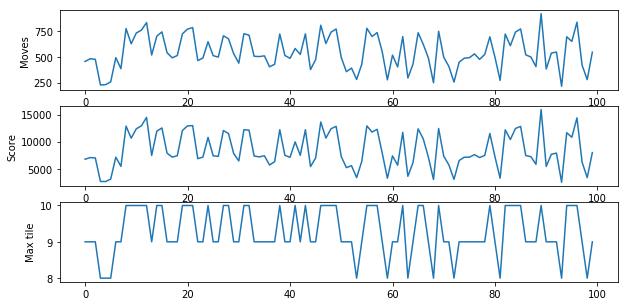

In [13]:
plt.subplots(figsize=(10, 5))
plt.subplot(311)
plt.plot(indices, moves)
plt.ylabel('Moves')
plt.subplot(312)
plt.plot(indices, scores)
plt.ylabel('Score')
plt.subplot(313)
plt.plot(indices, tiles)
plt.ylabel('Max tile')
plt.show()

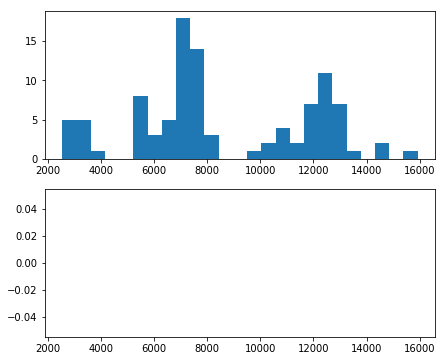

In [14]:
plt.subplots(figsize=(7, 6))
plt.subplot(211)
plt.hist(scores[:100], range=(min(scores), max(scores)), bins=25)
plt.subplot(212)
plt.hist(scores[100:150], range=(min(scores), max(scores)), bins=25)
plt.show()

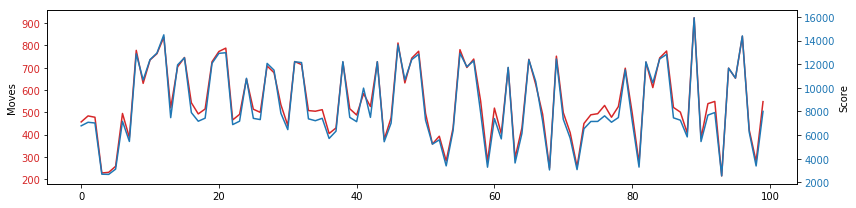

In [15]:
fig, ax1 = plt.subplots(figsize=(12,3))

color = 'tab:red'
ax1.plot(indices, moves, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Moves')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.plot(indices, scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Score')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [16]:
# Test if variances are the same
print(stats.bartlett(moves[:100], moves[100:150]))

BartlettResult(statistic=nan, pvalue=nan)


In [17]:
# Test if means are the same
print(stats.ttest_ind(moves[:100], moves[100:150], equal_var=False))

Ttest_indResult(statistic=nan, pvalue=nan)


Higher scoring games. Variance increases.

# Move distribution

In [18]:
moves = []
step = 50
for i in range(0, len(indices)-len(indices)%step, step):
    m = []
    for j in range(i, i+step):
        x = np.load('min'+str(j).zfill(5)+'.npz')
        m.extend(x['moves'])
    moves.append(m)

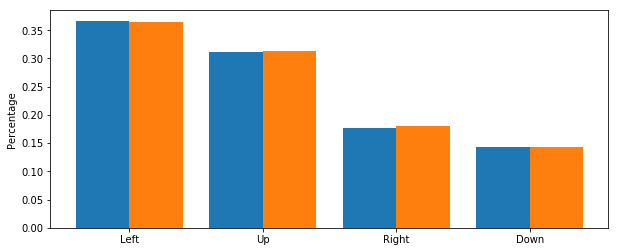

In [19]:
plt.figure(figsize=(10, 4))
plt.hist(moves, np.arange(5)-0.5, density=True)
plt.xticks(np.arange(4), ['Left', 'Up', 'Right', 'Down'])
# plt.legend([str(i) for i in range(0, len(indices), 10)])
plt.ylabel('Percentage')
plt.show()

Not sure why random mcts is still giving LURD move preference??

In [20]:
import pandas as pd
import seaborn as sns

In [24]:
moves = pd.DataFrame(columns=['group','Left','Up','Right','Down'])
for i in indices:
    x = np.load('min'+str(i).zfill(5)+'.npz')
    hist = np.histogram(x['moves'], bins=np.arange(5))[0]
    hist = hist / hist.sum()
    moves = moves.append({'group': 'Fixed' if i < 100 else 'Network',
                          'Left': hist[0],
                          'Up': hist[1],
                          'Right': hist[2],
                          'Down': hist[3]},
                          ignore_index=True)

In [25]:
moves = pd.melt(moves, id_vars='group', var_name='move', value_name='percent')

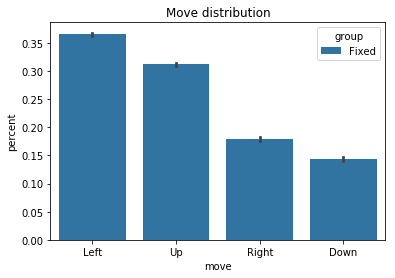

In [26]:
# Note: seaborn error bars are 95% CI of mean
ax = sns.barplot(x='move', y='percent', hue='group', data=moves)
ax.set_title('Move distribution')
plt.show()